In [1]:
import networkx as nx
import numpy as np
import pylab as pl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.facecolor'] = 'white'

In [3]:
class SelfLoop():
    def __init__(self, v_scale=0.25, h_scale=0.25, nodesize=100):
        self.v_scale = v_scale
        self.h_scale = h_scale
        self.nodesize = nodesize

    def selfloopstyle(self, posA, posB, *args, **kwargs):
        from matplotlib.path import Path

        selfloop_ht = 0.005 * self.nodesize

        data_loc = ax.transData.inverted().transform(posA)
        v_shift = self.v_scale * selfloop_ht
        h_shift = v_shift * self.h_scale

        path = [
            data_loc + np.asarray([0, v_shift]),
            data_loc + np.asarray([h_shift, v_shift]),
            data_loc + np.asarray([h_shift, 0]),
            data_loc,
            data_loc + np.asarray([-h_shift, 0]),
            data_loc + np.asarray([-h_shift, v_shift]),
            data_loc + np.asarray([0, v_shift]),
        ]

        ret = Path(ax.transData.transform(path), [1, 4, 4, 4, 4, 4, 4])

        return ret
    
    def style(self):
        return self.selfloopstyle

In [4]:
state_labels = ["Fast\nLow Optimal Action\nLow Reward", "Slow\nHigh Optimal Action\High Reward", 
                "Average\nMedium Optimal Action\nMedium Reward", "Fast\nMedium Optimal Action\nLow Reward", 
                "Slow\nHigh Optimal Action\nMedium Reward", "Average\nHigh Optimal Action\nHigh Reward"]

In [5]:
mat = np.array([[8.28108836e-001, 5.01297059e-003, 8.43704113e-002, 4.59287317e-002, 3.65790499e-002, 7.76089364e-037],
                [3.87618916e-002, 6.94857874e-001, 1.69897654e-003, 3.70705649e-002, 9.37393064e-002, 1.33871386e-001],
                [5.38332593e-130, 7.13339662e-056, 8.50509909e-001, 8.72301045e-002, 5.95432408e-002, 2.71674603e-003], 
                [7.20245405e-002, 4.45756954e-034, 6.52031255e-004, 8.40596477e-001, 8.59688144e-002, 7.58136450e-004], 
                [3.04085636e-002, 1.38944267e-001, 7.56362181e-004, 6.04837974e-002, 7.69407009e-001, 1.19834947e-017],
                [2.17805162e-002, 1.51285504e-133, 2.65587413e-002, 3.29210271e-002, 9.61512238e-002, 8.22588492e-001]])
#np.random.uniform(0,1,(4,4))

In [6]:
mat = np.round(mat,2)

In [7]:
mat

array([[0.83, 0.01, 0.08, 0.05, 0.04, 0.  ],
       [0.04, 0.69, 0.  , 0.04, 0.09, 0.13],
       [0.  , 0.  , 0.85, 0.09, 0.06, 0.  ],
       [0.07, 0.  , 0.  , 0.84, 0.09, 0.  ],
       [0.03, 0.14, 0.  , 0.06, 0.77, 0.  ],
       [0.02, 0.  , 0.03, 0.03, 0.1 , 0.82]])

In [8]:
# To make the graph more sparse, set everythng less than 0.3 = 0
mat[mat<0.07] = 0

In [9]:
G = nx.DiGraph(mat)

In [10]:
mapping = dict()
for i,n in enumerate(G.nodes()):
    mapping[n] = state_labels[i]


In [11]:
G.degree(weight='weight')

DiDegreeView({0: 1.8099999999999998, 1: 1.7399999999999998, 2: 1.8699999999999999, 3: 1.9299999999999997, 4: 1.96, 5: 1.8699999999999999})

In [12]:
G_relabeled = nx.relabel_nodes(G, mapping)

In [13]:
cmap = cm.get_cmap('magma_r',len(state_labels)+2)


/var/folders/mp/9lwthk5j5sjgylxrv66mspcc0000gn/T/ipykernel_2298/1543758580.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('magma_r',len(state_labels)+2)


In [14]:
#seed = np.random.randint(0,99999999,1)[0]
# seed = #88812322
#seed = 17560020
seed = 62902332
print(seed)
np.random.seed(seed)

62902332


In [15]:
# pos = nx.shell_layout(G_relabeled)#,scale=0.1,center=(-0.1,0))
pos = nx.spring_layout(G_relabeled)#,scale=0.1,center=(-0.1,0))
#pos = nx.kamada_kawai_layout(G_relabeled)
node_sizes = [ G_relabeled.degree(weight='weight')[n]*5500  for n in G_relabeled.nodes ]   # Depends on total degree of the network , in -degree + outdegree
node_colors = [cmap(i+1)  for i in np.arange(len(state_labels))] 
# edge_width_non_loops = [G_relabeled.edges[ed]['weight']*3.0   for ed in list(G_relabeled.edges) if ed[0]!=ed[1]] 
# edges_non_loops = [ed   for ed in list(G_relabeled.edges) if ed[0]!=ed[1]]
edge_width = [G_relabeled.edges[ed]['weight']*10.0   for ed in list(G_relabeled.edges)] 
print(edge_width)
for i,edge in enumerate(edge_width): 
    if edge > 1 and edge < 5: edge_width[i] *= 1.5
edges = [ed   for ed in list(G_relabeled.edges)]
               
               
     

[8.299999999999999, 0.8, 6.8999999999999995, 0.8999999999999999, 1.3, 8.5, 0.8999999999999999, 0.7000000000000001, 8.4, 0.8999999999999999, 1.4000000000000001, 7.7, 1.0, 8.2]


In [16]:
pos

{'Fast\nLow Optimal Action\nLow Reward': array([0.21213878, 1.        ]),
 'Slow\nHigh Optimal Action\\High Reward': array([ 0.1441035 , -0.39282618]),
 'Average\nMedium Optimal Action\nMedium Reward': array([-0.24681885,  0.56810151]),
 'Fast\nMedium Optimal Action\nLow Reward': array([0.06920901, 0.19788399]),
 'Slow\nHigh Optimal Action\nMedium Reward': array([-0.25594925, -0.55174207]),
 'Average\nHigh Optimal Action\nHigh Reward': array([ 0.07731681, -0.82141725])}

In [17]:
for k in state_labels:
    x = pos[k][0]
    y = pos[k][1]
    if np.abs(x)==1.0:
        if x < 0:
            pos[k][0] = -0.8
        else:
            pos[k][0] = 0.8
            
    if np.abs(y)==1.0:
        if y < 0:
            pos[k][1] = -0.8
        else:
            pos[k][1] = 0.8
            

In [383]:
# pos['slow\nexploration'] = np.array([-0.95,0.5])

In [18]:
node_colors

[(0.997341, 0.733545, 0.505167, 1.0),
 (0.973381, 0.46152, 0.361965, 1.0),
 (0.828886, 0.262229, 0.430644, 1.0),
 (0.594508, 0.175701, 0.501241, 1.0),
 (0.372116, 0.092816, 0.499053, 1.0),
 (0.135053, 0.068391, 0.315, 1.0)]

In [19]:
node_sizes

[9954.999999999998,
 9569.999999999998,
 10285.0,
 10614.999999999998,
 10780.0,
 10285.0]

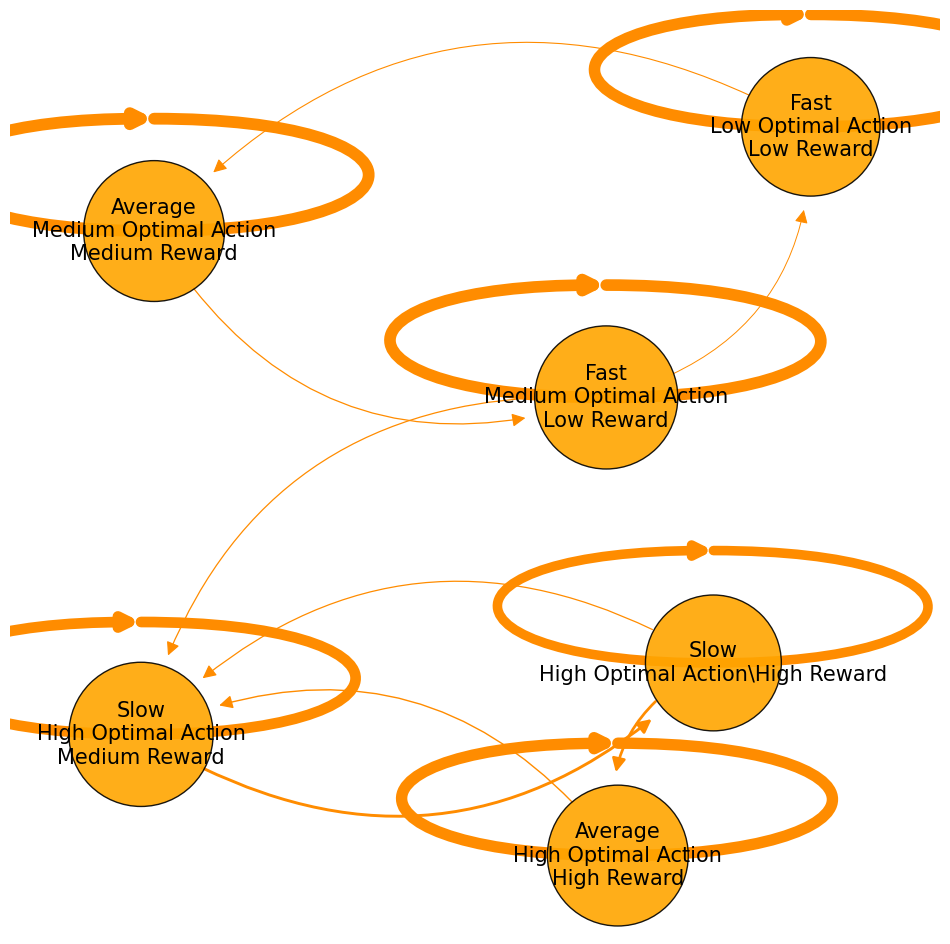

In [20]:
fig,ax = pl.subplots(1,1,figsize=(12,12))
nodes = nx.draw_networkx_nodes(G_relabeled,node_size=node_sizes,alpha=0.9,pos=pos,ax=ax,node_color='orange')#node_colors[2])
nodes.set_edgecolor('k')
nx.draw_networkx_labels(G_relabeled,pos=pos,ax=ax,font_size=15)
e = nx.draw_networkx_edges(G_relabeled,pos=pos,ax=ax,width=edge_width,edgelist = edges,connectionstyle='arc3, rad = 0.4',min_source_margin=50,min_target_margin=60,arrows=True,arrowsize=20, arrowstyle='-|>',edge_color='darkorange')
for i,x in enumerate(list(G_relabeled.edges)):
    if x[0] == x[1]:
        if "slow" in x[0]:
            e[i]._connector = SelfLoop(-0.5,0.8,).style()
        else:
            e[i]._connector = SelfLoop(0.5,0.8,).style()
    
# e[0]._connector = SelfLoop(0.6,0.8,).style()
# e[5]._connector = SelfLoop(0.5,0.9).style()
# e[10]._connector = SelfLoop(0.4,1.0).style()
# e[15]._connector = SelfLoop(0.6,0.8).style()
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.left.set_visible(False)
ax.spines.bottom.set_visible(False)
fig.savefig("average_state_transition_graph.png")

In [387]:
np.array(G_relabeled.edges)

array([['fast\nexploration', 'fast\nexploration'],
       ['fast\nexploration', 'slow\nexploration'],
       ['fast\nexploration', 'intermediate'],
       ['slow\nexploration', 'fast\nexploration'],
       ['slow\nexploration', 'slow\nexploration'],
       ['slow\nexploration', 'intermediate'],
       ['intermediate', 'fast\nexploration'],
       ['intermediate', 'intermediate'],
       ['intermediate', 'exploitation'],
       ['exploitation', 'fast\nexploration'],
       ['exploitation', 'exploitation']], dtype='<U16')

In [388]:
x

('exploitation', 'exploitation')

In [389]:
e

In [390]:
G_relabeled.edges[list(G_relabeled.edges)[0]]['weight']

0.83

In [391]:
A = nx.drawing.nx_agraph.to_agraph(G_relabeled) 
A.layout('dot')                                                                 
A.draw('state.png')  

ImportError: requires pygraphviz http://pygraphviz.github.io/